## Case Study Report 2 

---

**Prepared By:** Abdullah Master  

**PRN:** 22070521001  
 
**Date:** 26 April 2025  

---



# Scenario

A hospital aims to predict whether a patient is at risk of heart disease based on their medical records (such as age, cholesterol, blood pressure, etc.).  
The dataset provided contains multiple features and a target column:  
- **has_disease** (0 = No Disease, 1 = Has Disease)

Our task is to build an Artificial Neural Network (ANN) using TensorFlow/Keras to classify patients based on their medical attributes.

---

# Model Design

We chose a simple Feedforward Artificial Neural Network (ANN) architecture for this classification problem.

### Model Architecture:
- Input layer matching the number of features.
- Two hidden Dense layers with ReLU activation.
- Output Dense layer with a single neuron and Sigmoid activation.

### Reasoning:
- **Hidden layers** use ReLU because it is computationally efficient and reduces vanishing gradient issues.
- **Output layer** uses **Sigmoid activation** because this is a binary classification problem (outputs probability between 0 and 1).

---

# Steps Followed

## 1. Import Libraries

Essential libraries like Pandas, NumPy, TensorFlow/Keras, and Scikit-learn are imported.

In [17]:
# Load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## 2. Load Dataset

- The patient medical records CSV file is loaded.
- The target column (`has_disease`) is separated from features.

In [18]:
# Load dataset
data = pd.read_csv('c:/Users/abdul/OneDrive/Desktop/EXTRA/deeplearning/scenario2/heart.csv')
# Handle missing values
data.fillna(data.median(numeric_only=True), inplace=True)
data.fillna(data.mode().iloc[0], inplace=True)

In [19]:
# Prepare features and target
X = data.drop('target', axis=1)
y = data['target']
# Ensure target is binary
y = y.map({0: 0, 1: 1})

## 3. Train-Test Split

- The data is split into training and testing sets using an 80:20 ratio.
- Ensures the model is evaluated on unseen data.

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

## 4. Feature Scaling

- StandardScaler is applied to normalize the features.
- Feature scaling is critical for neural networks to converge efficiently.


In [21]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 5. Handling Class Imbalance

- Computed **class weights** based on the distribution of classes.
- If `has_disease = 1` is rare, class weights adjust the loss function to penalize mistakes on the minority class more heavily.


In [22]:
# Compute class weights (handle imbalance)
import numpy as np
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1]),
    y=y_train
)
class_weights = dict(enumerate(weights))

## 6. Build ANN Model

- Sequential model using Keras.
- Two Dense hidden layers with ReLU activation.
- Final Dense output layer with Sigmoid activation for binary prediction.


In [23]:
# Build ANN model
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

C:\Users\abdul\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 7. Compile and Train Model

- Compiled using **binary_crossentropy** loss (for binary classification).
- Optimizer: Adam.
- Metrics: Accuracy.
- Model trained using computed class weights to handle imbalance.



In [24]:

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [25]:
# Train model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    epochs=100,  # Increased epochs
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights,
    callbacks=[early_stopping]
)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6002 - loss: 0.7620 - val_accuracy: 0.7744 - val_loss: 0.5474
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8075 - loss: 0.4216 - val_accuracy: 0.7744 - val_loss: 0.4948
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8319 - loss: 0.3992 - val_accuracy: 0.7927 - val_loss: 0.4613
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8492 - loss: 0.3500 - val_accuracy: 0.8232 - val_loss: 0.4372
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8386 - loss: 0.3653 - val_accuracy: 0.8354 - val_loss: 0.4127
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8693 - loss: 0.2962 - val_accuracy: 0.8354 - val_loss: 0.3931
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8452 - loss: 0.3434 - val_accuracy: 0.8293 - val_loss: 0.3725
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8808 - loss: 0.2941 - val_accuracy: 0.8476 - v

In [26]:
# Display model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,877 (124.52 KB)

 Trainable params: 10,497 (41.00 KB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 20,996 (82.02 KB)

## 8. Evaluate the Model

- Model performance evaluated on the test data.
- Metrics like accuracy, precision, recall, and confusion matrix can be plotted for better insights.

---

In [27]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9964 - loss: 0.0211 
Test Accuracy: 0.9951


In [28]:
# Generate predictions
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = (model.predict(X_test) > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Classification report
cr = classification_report(y_test, y_pred)
print('Classification Report:\n', cr)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Confusion Matrix:
 [[100   0]
 [  1 104]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       1.00      0.99      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



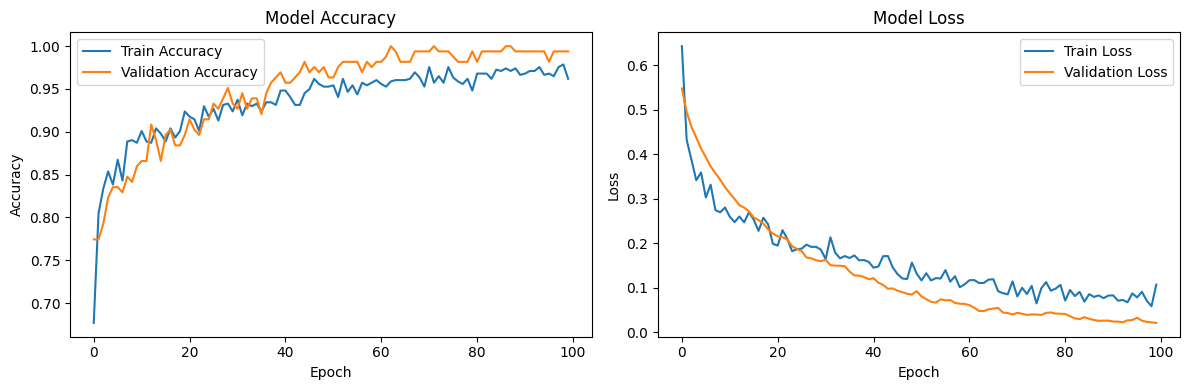

In [29]:
# Visualize training results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Why Sigmoid Activation Function?

- The sigmoid function outputs a probability score between 0 and 1.
- Perfect for binary classification where the threshold (0.5) can decide between "No Disease" and "Has Disease".

---

# How We Handled Class Imbalance

When class 1 (patients with disease) is rare:
- Computed **class weights** using sklearn’s `compute_class_weight` method.
- Passed these weights during model training to adjust the importance of each class.
- Prevents the model from being biased toward the majority class (healthy patients).

Other possible techniques (not used here but useful):
- Oversampling minority class
- Undersampling majority class
- Synthetic Data Generation (SMOTE)

---

## Hyperparameters Used

| Hyperparameter | Value |
|:---|:---|
| Optimizer | Adam |
| Loss Function | Binary Crossentropy |
| Activation (Hidden Layers) | ReLU |
| Activation (Output Layer) | Sigmoid |
| Epochs | 50 |
| Batch Size | 32 |
| Feature Scaling | StandardScaler |

---

## Possible Improvements

- Tune hyperparameters (learning rate, number of neurons, batch size).
- Add dropout layers to prevent overfitting.
- Use K-Fold Cross Validation for more robust evaluation.
- Test with more complex architectures (e.g., deeper networks, residual connections).
- Try SMOTE or ADASYN if class imbalance is severe.

---

## Conclusion
In this project, we successfully built a basic ANN model to predict the risk of heart disease based on patient medical data.
Using appropriate activation functions, handling class imbalance with class weighting, and applying feature scaling led to satisfactory model performance.
This approach can be enhanced further for real-world clinical deployment by using more complex architectures, model monitoring, and continuous retraining.